# Example 1

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# algemene gegevens
x = sym.symbols('x')
EI, EA = sym.symbols('EI EA')
CV, CM, Cphi, Cuz, CN, Cux = sym.symbols('C_V C_M C_phi C_uz C_N C_ux') 
dx = 10**-15

# gegevens constructie
a0, a1, a2, a3 = 0, 4, 9, 14
aa = np.array([a0, a1, a2, a3])
o0, o1, o2 = 0, sym.atan(3/4), sym.atan(-4/3)
oo = np.array([o0, o1, o2])
L = 14

# gegevens belastingen
Fh, qv, Fv = 15, 6, 16
Rv, Rh, Tr = sym.symbols('R_v R_h T_R')
B = np.array([Fh, qv, -qv, Fv, Rv, Rh, Tr])
b1, b2, b3, b4 = 0, 2, 6.5, 14
bb = np.array([b1, b1, b3, b2, b4, b4, b4])
# K = 1, Fv = 2, Fh = 3, qv = 4, qh = 5
nn = np.array([3, 4, 4, 2, 2, 3, 1])

In [3]:
#qz opstellen
qz = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 1:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[-1])
            if nn[i] == 4:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            if nn[i] == 5:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 1:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
                if nn[i] == 2:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 3:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[j-1])
                if nn[i] == 4:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 5:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[j-1])
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.sin(oo[j]) - sym.sin(oo[j-1]))
            if nn[i] == 4:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))
            if nn[i] == 5:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.sin(oo[j]) - sym.sin(oo[j-1])))

display(sym.symbols('{q_z}='), qz)

{q_z}=

-0.8*R_h*SingularityFunction(x, 14.0, -1) + 0.6*R_v*SingularityFunction(x, 14.0, -1) + T_R*SingularityFunction(x, 14.0, -2) + 6*SingularityFunction(x, 0.0, 0) + 16*SingularityFunction(x, 2.0, -1) + 1.0*SingularityFunction(x, 4, -1) - 1.2*SingularityFunction(x, 4, 0) - 4.8*SingularityFunction(x, 6.5, 0) - 32.0*SingularityFunction(x, 9, -1)

In [4]:
#qx opstellen
qx = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[-1])
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 4:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[-1])
            if nn[i] == 5:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 2:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[j-1])
                if nn[i] == 3:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 4:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[j-1])
                if nn[i] == 5:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (-sym.sin(oo[j]) + sym.sin(oo[j-1]))
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 4:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (-sym.sin(oo[j]) + sym.sin(oo[j-1])))
            if nn[i] == 5:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))

display(sym.symbols('{q_x}='), qx)

{q_x}=

0.6*R_h*SingularityFunction(x, 14.0, -1) + 0.8*R_v*SingularityFunction(x, 14.0, -1) + 15*SingularityFunction(x, 0.0, -1) - 27.0*SingularityFunction(x, 4, -1) - 3.6*SingularityFunction(x, 4, 0) + 3.6*SingularityFunction(x, 6.5, 0) + 74.0*SingularityFunction(x, 9, -1)

In [5]:
V = -sym.integrate(qz.expand(), x) + CV
M = sym.integrate(V, x) + CM
kappa = M / EI
phi = sym.integrate(kappa, x) + Cphi
uz = -sym.integrate(phi, x) + Cuz

N = -sym.integrate(qx.expand(), x) + CN
epsilon = N / EA
ux = sym.integrate(epsilon, x) + Cux

uvz = uz.subs(x,0) * sym.cos(o0)
uvx = -ux.subs(x,0) * sym.sin(o0)
for i in range(len(oo)):
    uvz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
    uvx += -((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
uv = uvz + uvx

uhz = uz.subs(x,0) * sym.sin(o0)
uhx = ux.subs(x,0) * sym.cos(o0)
for i in range(len(oo)):
    uhz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
    uhx += ((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
uh = uhz + uhx

display(sym.symbols('{N}='), N)
display(sym.symbols('{V}='), V)
display(sym.symbols('{M}='), M)
display(sym.symbols('{u_x}='), ux)
display(sym.symbols('{\phi}='), phi)
display(sym.symbols('{u_z}='), uz)
display(sym.symbols('{u_v}='), uv)
display(sym.symbols('{u_h}='), uh)

{N}=

C_N - 0.6*R_h*SingularityFunction(x, 14.0, 0) - 0.8*R_v*SingularityFunction(x, 14.0, 0) - 15*SingularityFunction(x, 0.0, 0) + 27.0*SingularityFunction(x, 4, 0) + 3.6*SingularityFunction(x, 4, 1) - 3.6*SingularityFunction(x, 6.5, 1) - 74.0*SingularityFunction(x, 9, 0)

{V}=

C_V + 0.8*R_h*SingularityFunction(x, 14.0, 0) - 0.6*R_v*SingularityFunction(x, 14.0, 0) - T_R*SingularityFunction(x, 14.0, -1) - 6*SingularityFunction(x, 0.0, 1) - 16*SingularityFunction(x, 2.0, 0) - 1.0*SingularityFunction(x, 4, 0) + 1.2*SingularityFunction(x, 4, 1) + 4.8*SingularityFunction(x, 6.5, 1) + 32.0*SingularityFunction(x, 9, 0)

{M}=

C_M + C_V*x + 0.8*R_h*SingularityFunction(x, 14.0, 1) - 0.6*R_v*SingularityFunction(x, 14.0, 1) - T_R*SingularityFunction(x, 14.0, 0) - 3*SingularityFunction(x, 0.0, 2) - 16*SingularityFunction(x, 2.0, 1) - 1.0*SingularityFunction(x, 4, 1) + 0.6*SingularityFunction(x, 4, 2) + 2.4*SingularityFunction(x, 6.5, 2) + 32.0*SingularityFunction(x, 9, 1)

{u_x}=

C_ux + (C_N*x - 0.6*R_h*SingularityFunction(x, 14.0, 1) - 0.8*R_v*SingularityFunction(x, 14.0, 1) - 15*SingularityFunction(x, 0.0, 1) + 27.0*SingularityFunction(x, 4, 1) + 1.8*SingularityFunction(x, 4, 2) - 1.8*SingularityFunction(x, 6.5, 2) - 74.0*SingularityFunction(x, 9, 1))/EA

{\phi}=

C_phi + (C_M*x + C_V*x**2/2 + 0.4*R_h*SingularityFunction(x, 14.0, 2) - 0.3*R_v*SingularityFunction(x, 14.0, 2) - T_R*SingularityFunction(x, 14.0, 1) - SingularityFunction(x, 0.0, 3) - 8*SingularityFunction(x, 2.0, 2) - 0.500000000000001*SingularityFunction(x, 4, 2) + 0.2*SingularityFunction(x, 4, 3) + 0.8*SingularityFunction(x, 6.5, 3) + 16.0*SingularityFunction(x, 9, 2))/EI

{u_z}=

-C_phi*x + C_uz - (C_M*x**2/2 + C_V*x**3/6 + 0.133333333333333*R_h*SingularityFunction(x, 14.0, 3) - 0.1*R_v*SingularityFunction(x, 14.0, 3) - T_R*SingularityFunction(x, 14.0, 2)/2 - SingularityFunction(x, 0.0, 4)/4 - 8*SingularityFunction(x, 2.0, 3)/3 - 0.166666666666667*SingularityFunction(x, 4, 3) + 0.05*SingularityFunction(x, 4, 4) + 0.2*SingularityFunction(x, 6.5, 4) + 5.33333333333333*SingularityFunction(x, 9, 3))/EI

{u_v}=

C_uz + (-C_phi*x - (C_M*x**2/2 + C_V*x**3/6 + 0.133333333333333*R_h*SingularityFunction(x, 14.0, 3) - 0.1*R_v*SingularityFunction(x, 14.0, 3) - T_R*SingularityFunction(x, 14.0, 2)/2 - SingularityFunction(x, 0.0, 4)/4 - 8*SingularityFunction(x, 2.0, 3)/3 - 0.166666666666667*SingularityFunction(x, 4, 3) + 0.05*SingularityFunction(x, 4, 4) + 0.2*SingularityFunction(x, 6.5, 4) + 5.33333333333333*SingularityFunction(x, 9, 3))/EI)*SingularityFunction(x, 0, 0) - 0.6*(-(4*C_N - 60.0)/EA + (C_N*x - 0.6*R_h*SingularityFunction(x, 14.0, 1) - 0.8*R_v*SingularityFunction(x, 14.0, 1) - 15*SingularityFunction(x, 0.0, 1) + 27.0*SingularityFunction(x, 4, 1) + 1.8*SingularityFunction(x, 4, 2) - 1.8*SingularityFunction(x, 6.5, 2) - 74.0*SingularityFunction(x, 9, 1))/EA)*SingularityFunction(x, 4, 0) + 1.4*(-(9*C_N + 33.75)/EA + (C_N*x - 0.6*R_h*SingularityFunction(x, 14.0, 1) - 0.8*R_v*SingularityFunction(x, 14.0, 1) - 15*SingularityFunction(x, 0.0, 1) + 27.0*SingularityFunction(x, 4, 1) + 1.8*Singularity

{u_h}=

C_ux - 0.2*(-(4*C_N - 60.0)/EA + (C_N*x - 0.6*R_h*SingularityFunction(x, 14.0, 1) - 0.8*R_v*SingularityFunction(x, 14.0, 1) - 15*SingularityFunction(x, 0.0, 1) + 27.0*SingularityFunction(x, 4, 1) + 1.8*SingularityFunction(x, 4, 2) - 1.8*SingularityFunction(x, 6.5, 2) - 74.0*SingularityFunction(x, 9, 1))/EA)*SingularityFunction(x, 4, 0) - 0.2*(-(9*C_N + 33.75)/EA + (C_N*x - 0.6*R_h*SingularityFunction(x, 14.0, 1) - 0.8*R_v*SingularityFunction(x, 14.0, 1) - 15*SingularityFunction(x, 0.0, 1) + 27.0*SingularityFunction(x, 4, 1) + 1.8*SingularityFunction(x, 4, 2) - 1.8*SingularityFunction(x, 6.5, 2) - 74.0*SingularityFunction(x, 9, 1))/EA)*SingularityFunction(x, 9, 0) - 0.6*(-(14*C_N - 231.25)/EA + (C_N*x - 0.6*R_h*SingularityFunction(x, 14.0, 1) - 0.8*R_v*SingularityFunction(x, 14.0, 1) - 15*SingularityFunction(x, 0.0, 1) + 27.0*SingularityFunction(x, 4, 1) + 1.8*SingularityFunction(x, 4, 2) - 1.8*SingularityFunction(x, 6.5, 2) - 74.0*SingularityFunction(x, 9, 1))/EA)*SingularityFunction(x

In [6]:
# 3 reactiekrachten + 6 integratieconstanten = 9 voorwaarden
Eq1 = sym.Eq(N.subs(x,0-dx),0)
Eq2 = sym.Eq(N.subs(x,L+dx),0)
Eq3 = sym.Eq(V.subs(x,0-dx),0)
Eq4 = sym.Eq(V.subs(x,L+dx),0)
Eq5 = sym.Eq(M.subs(x,0),0)
Eq6 = sym.Eq(M.subs(x,L+dx),0)
Eq7 = sym.Eq(phi.subs(x,L),0)
Eq8 = sym.Eq(uv.subs(x,L),0)
Eq9 = sym.Eq(uh.subs(x,L),0)

In [7]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9),(Rv,Rh,Tr,CN,CV,CM,Cphi,Cuz,Cux))
display(sol)

{C_M: 0.0,
 C_N: 0.0,
 C_V: 0.0,
 C_phi: 3008.5/EI,
 C_ux: 0.0625*(56875.0*EA + 2304.0*EI)/(EA*EI),
 C_uz: 0.0833333333333333*(300259.0*EA + 3219.0*EI)/(EA*EI),
 R_h: -15.0000000000000,
 R_v: -55.0000000000000,
 T_R: -435.000000000000}

In [8]:
ea = 10**4
ei = 3 * 10**4

display(f'{Rv} = {Rv.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Rh} = {Rh.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Tr} = {Tr.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{CN} = {CN.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CV} = {CV.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CM} = {CM.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cphi} = {Cphi.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cux} = {Cux.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cuz} = {Cuz.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

'R_v = -55.00'

'R_h = -15.00'

'T_R = -435.00'

'C_N = 0.00'

'C_V = 0.00'

'C_M = 0.00'

'C_phi = 0.1003'

'C_ux = 0.1329'

'C_uz = 0.8609'

In [9]:
v = 0
h = 0
for i in range(len(oo)):
    v += -(sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.sin(oo[i])
    h += (sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.cos(oo[i])

-15*SingularityFunction(x, 0.0, 0) + 27.0*SingularityFunction(x, 4, 0) + 3.6*SingularityFunction(x, 4, 1) - 3.6*SingularityFunction(x, 6.5, 1) - 74.0*SingularityFunction(x, 9, 0) + 53.0*SingularityFunction(x, 14.0, 0)

'N(0) = -15.0000000000000'

'N(4+) = 12.0000000000000'

'N(9-) = 21.0000000000000'

'N(9+) = -53.0000000000000'

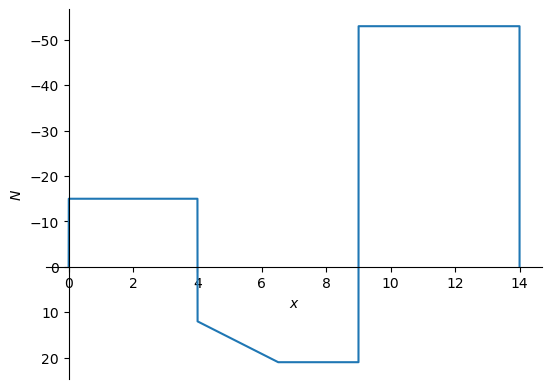

In [10]:
x_np = np.linspace(0-dx,L+dx,10000)
N_np = sym.lambdify(x, N.subs(sol).rewrite(sym.Piecewise))
display(N.subs(sol))
display(f'N(0) = {N.subs(x,0).subs(sol)}')
display(f'N(4+) = {N.subs(x,4).subs(sol)}')
display(f'N(9-) = {N.subs(x,9-dx).subs(sol)}')
display(f'N(9+) = {N.subs(x,9).subs(sol)}')

plt.figure()
plt.plot(x_np,N_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$N$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

-6*SingularityFunction(x, 0.0, 1) - 16*SingularityFunction(x, 2.0, 0) - 1.0*SingularityFunction(x, 4, 0) + 1.2*SingularityFunction(x, 4, 1) + 4.8*SingularityFunction(x, 6.5, 1) + 32.0*SingularityFunction(x, 9, 0) + 435.0*SingularityFunction(x, 14.0, -1) + 21.0*SingularityFunction(x, 14.0, 0)

'V(2-) = -12.0000000000000'

'V(2+) = -28.0000000000000'

'V(4-) = -40.0000000000000'

'V(4+) = -41.0000000000000'

'V(9-) = -53.0000000000000'

'V(9+) = -21.0000000000000'

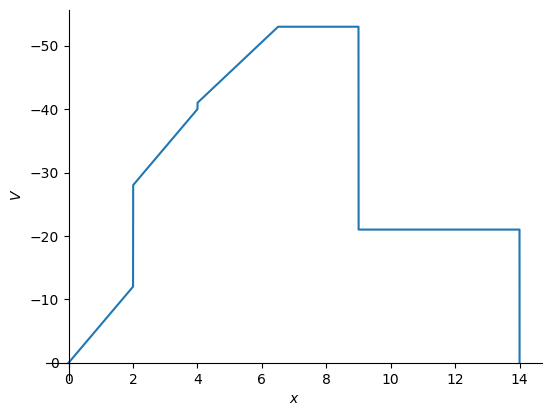

In [11]:
V_np = sym.lambdify(x, V.subs(sol).rewrite(sym.Piecewise))
display(V.subs(sol))
display(f'V(2-) = {V.subs(x,b2-dx).subs(sol)}')
display(f'V(2+) = {V.subs(x,b2).subs(sol)}')
display(f'V(4-) = {V.subs(x,a1-dx).subs(sol)}')
display(f'V(4+) = {V.subs(x,a1).subs(sol)}')
display(f'V(9-) = {V.subs(x,a2-dx).subs(sol)}')
display(f'V(9+) = {V.subs(x,a2).subs(sol)}')

plt.figure()
plt.plot(x_np,V_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

-3*SingularityFunction(x, 0.0, 2) - 16*SingularityFunction(x, 2.0, 1) - 1.0*SingularityFunction(x, 4, 1) + 0.6*SingularityFunction(x, 4, 2) + 2.4*SingularityFunction(x, 6.5, 2) + 32.0*SingularityFunction(x, 9, 1) + 435.0*SingularityFunction(x, 14.0, 0) + 21.0*SingularityFunction(x, 14.0, 1)

'M(4) = -80.0000000000000'

'M(9) = -330.000000000000'

'M(14) = -435.000000000000'

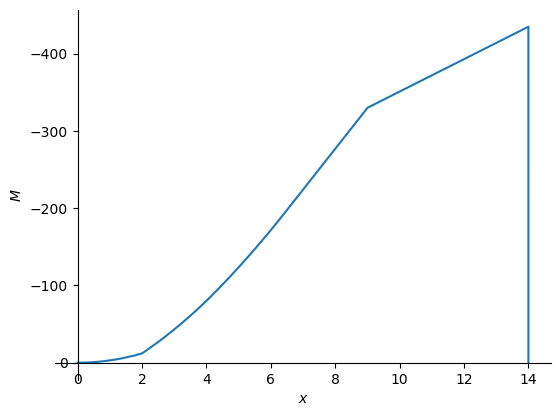

In [12]:
M_np = sym.lambdify(x, M.subs(sol).rewrite(sym.Piecewise))
display(M.subs(sol))
display(f'M(4) = {M.subs(x,4).subs(sol)}')
display(f'M(9) = {M.subs(x,9).subs(sol)}')
display(f'M(14) = {M.subs(x,14-dx).subs(sol)}')

plt.figure()
plt.plot(x_np,M_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$M$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'uv(0) = 0.8609'

'uv(4) = 0.4626'

'uv(9) = 0.1212'

'uh(0) = 0.1329'

'uh(4) = 0.1269'

'uh(9) = -0.1174'

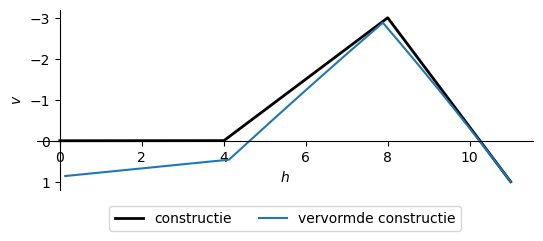

In [13]:
v_np = sym.lambdify(x, v.rewrite(sym.Piecewise))
h_np = sym.lambdify(x, h.rewrite(sym.Piecewise))

uv_np = sym.lambdify(x, uv.subs(sol).subs(EI,3*10**4).subs(EA,10**4).rewrite(sym.Piecewise))
uh_np = sym.lambdify(x, uh.subs(sol).subs(EI,3*10**4).subs(EA,10**4).rewrite(sym.Piecewise))

#display(uv.subs(sol))
display(f'uv(0) = {uv.subs(x,0).subs(sol).subs(EI,3*10**4).subs(EA,10**4):.4f}')
display(f'uv(4) = {uv.subs(x,4).subs(sol).subs(EI,3*10**4).subs(EA,10**4):.4f}')
display(f'uv(9) = {uv.subs(x,9).subs(sol).subs(EI,3*10**4).subs(EA,10**4):.4f}')

#display(uh.subs(sol))
display(f'uh(0) = {uh.subs(x,0).subs(sol).subs(EI,3*10**4).subs(EA,10**4):.4f}')
display(f'uh(4) = {uh.subs(x,4).subs(sol).subs(EI,3*10**4).subs(EA,10**4):.4f}')
display(f'uh(9) = {uh.subs(x,9).subs(sol).subs(EI,3*10**4).subs(EA,10**4):.4f}')

plt.figure()
plt.plot(h_np(x_np),v_np(x_np), linewidth=2, color='black', label='constructie')
plt.plot((h_np(x_np)+uh_np(x_np)),(v_np(x_np)+uv_np(x_np)), label='vervormde constructie')
plt.xlabel('$h$')
plt.ylabel('$v$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
plt.axis('scaled')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=False, ncol=3);